In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [7]:
data = pd.read_csv("/home/arikan/UT/Spring2017/DataMining/Data-Mining-Project/data.csv", encoding = "ISO-8859-1")
data["Lyrics"] = data.Lyrics.fillna("")
data["Artist"] = data.Artist.apply(lambda artist: ",".join(re.split(" and | featuring ", artist)))
artists_grouped = data.groupby('Artist').count()
popular_artists = data.Artist.value_counts()
popular_artists = popular_artists[popular_artists > 5]
popular_artists

madonna                      35
elton john                   26
mariah carey                 25
stevie wonder                22
michael jackson              22
janet jackson                22
taylor swift                 19
whitney houston              19
rihanna                      19
pink                         17
kelly clarkson               17
the beatles                  17
the black eyed peas          16
britney spears               16
chicago                      15
katy perry                   14
aretha franklin              14
rod stewart                  14
usher                        14
maroon 5                     13
kool  the gang               13
boyz ii men                  13
phil collins                 13
r kelly                      13
the rolling stones           13
neil diamond                 12
olivia newtonjohn            12
the temptations              12
billy joel                   12
eminem                       12
                             ..
coldplay

In [9]:
spans = dict()
for artist in popular_artists.to_dict().keys():
    span = data[data.Artist.str.contains(artist)].Year.sort_values().unique().tolist()
    start = span[0]
    end = span[-1]
    if (end - start) > 0:
        spans[artist] = (end - start)
    
avg_songs_per_year = dict()
for artist in popular_artists.to_dict().keys():
    howmanysongs = data[data.Artist.str.contains(artist)].Year.count()
    if artist in spans:
        avg_songs_per_year[artist] = float(howmanysongs) / float(spans[artist])
    
result_x = []
result_y = []
for artist in spans.keys():
    result_x.append(spans[artist])
    result_y.append(avg_songs_per_year[artist])
len(result_x) == len(result_y)

True

In [10]:
def plot(x, y, title, xlabel, ylabel):
    fig = plt.figure(figsize=(10,8))
    plt.scatter(x, y, s=30, c='b', marker="D", alpha=0.5)
    fig.suptitle(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

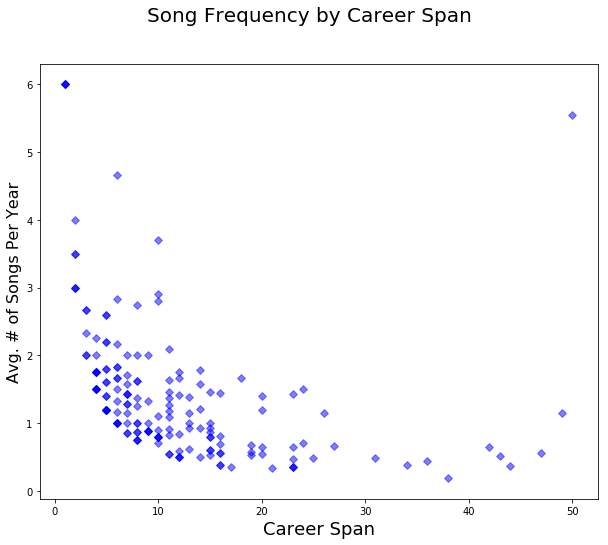

In [11]:
plot(result_x, result_y, 'Song Frequency by Career Span', 'Career Span', 'Avg. # of Songs Per Year')